# 3D Local thickness

Notebook author: Felipe Delestro (fima@dtu.dk)

Based on the local thickness algorithmn, this notebooks shows how we can simply threshold a volume and calculate the local thickness of the obtained foreground. We can analyse the thickness distribution using a simple histogram.

The Notebook also explores the impact of the scale parameter of the algorithm.

## Dependencies
The local thickness library can be installed via `pip install localthickness`.

For more examples and details check https://github.com/vedranaa/local-thickness


## Reference this work
Dahl, V. A., & Dahl, A. B. (2023). Fast Local Thickness. 2023 IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (CVPRW). https://doi.org/10.1109/cvprw59228.2023.00456

```bibtex
@inproceedings{Dahl_2023,
	doi = {10.1109/cvprw59228.2023.00456},
	url = {https://doi.org/10.1109%2Fcvprw59228.2023.00456},
	year = 2023,
	month = {jun},
	publisher = {{IEEE}},
	author = {Vedrana Andersen Dahl and Anders Bjorholm Dahl},
	title = {Fast Local Thickness},
	booktitle = {2023 {IEEE}/{CVF} Conference on Computer Vision and Pattern Recognition Workshops ({CVPRW})}
}
```

# Imports

In [1]:
import numpy as np
import qim3d
import localthickness as lt
import matplotlib.pyplot as plt
import time

# Parameters & helper functions

In [2]:
threshold = 64 # used for volume foreground

def plot_histogram(vol_lt, nbins = 12):
    # Ignore zero thickness
    non_zero_values = vol_lt[vol_lt > 0]

    # Calculate histogram
    vol_hist, bin_edges = np.histogram(non_zero_values, bins=nbins)

    # Plot histogram
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(bin_edges[:-1], vol_hist, width=np.diff(bin_edges), ec="white", align="edge")

    # Adjustments
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yscale("log")
    
    plt.show()

# Load data
Here we use `qim3d` to easily get an example of a volume

In [3]:
# Use example data from the Qim3D library
vol = qim3d.examples.cement_128x128x128

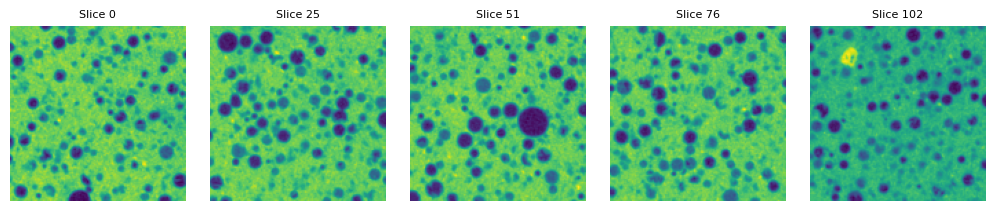

In [4]:
# Get a list of slices fo visualize
slices = (np.linspace(start=0, stop=len(vol), num=5, endpoint=False)).astype(int)

# Using qim3d for visualization
qim3d.viz.slice_viz(vol, position=slices)

## Threshold the volume
The Local thickness algorithm expects a binary input, so we simply threshold the volume

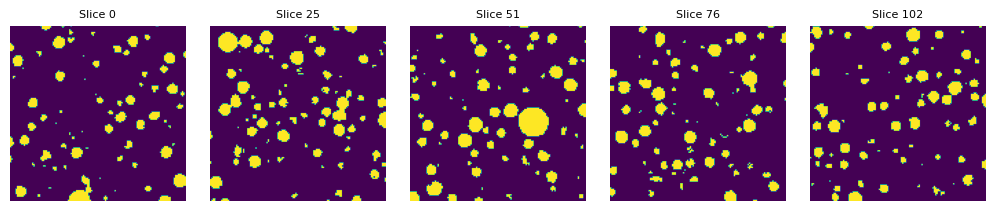

In [5]:
vol = vol < threshold  # Values lower than the threshold will be set to True (foreground)
qim3d.viz.slice_viz(vol, position=slices)

## Local thickness

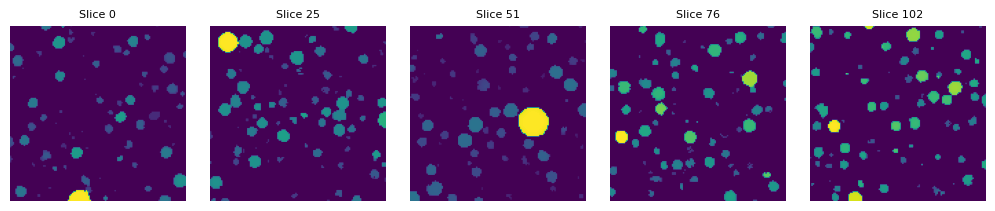

In [6]:
vol_lt = lt.local_thickness(vol, scale=1.0)
qim3d.viz.slice_viz(vol_lt, position=slices)

## Check histogram
A simple histogram is a straightforward way to check the local thickness distribution.

For the `cement_128x128x128` example, we can see that a small part of the volume is occupied by the larger structures 

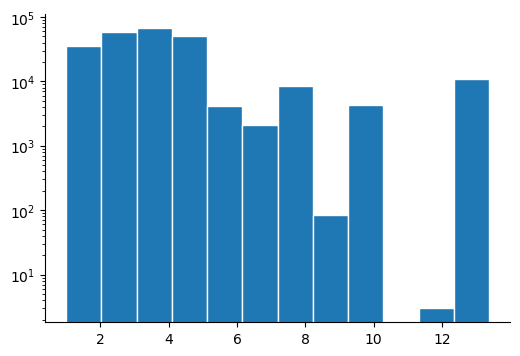

In [7]:
plot_histogram(vol_lt)

## Check effect of the scale parameter




Scale: 1.000
Process done in 1.301 seconds


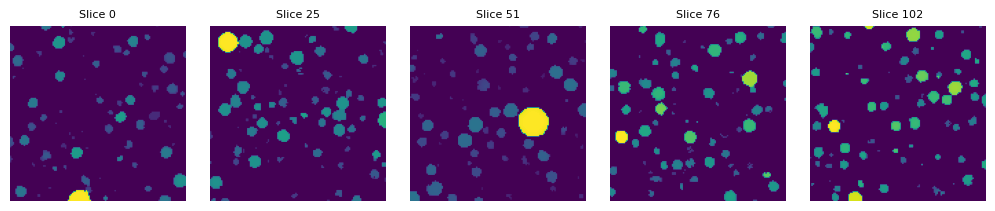

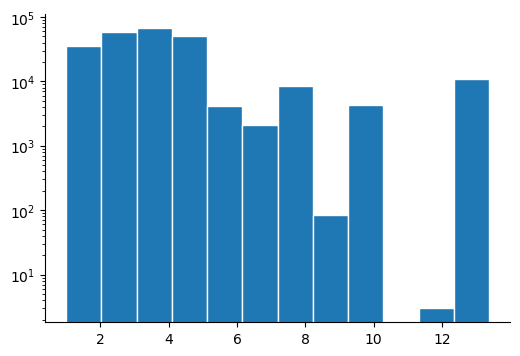




Scale: 0.800
Process done in 0.897 seconds


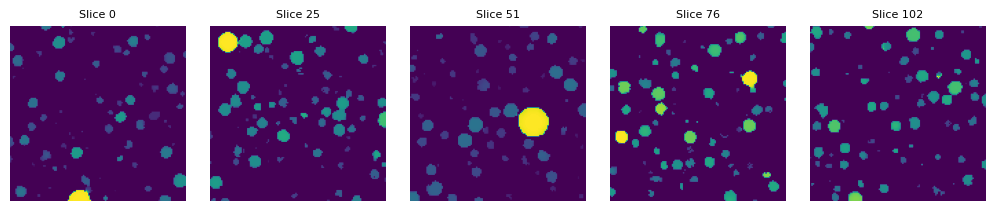

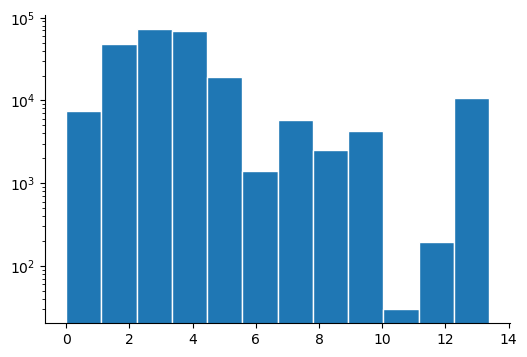




Scale: 0.600
Process done in 0.535 seconds


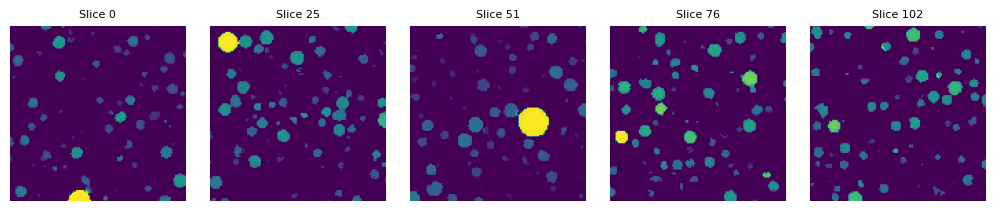

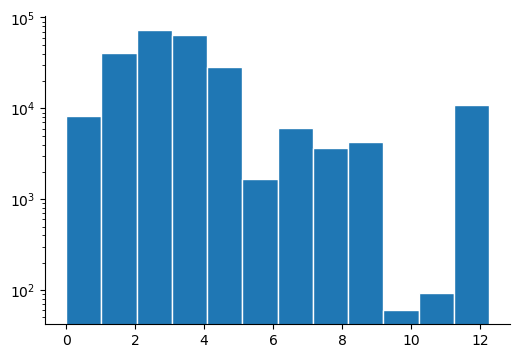




Scale: 0.400
Process done in 0.393 seconds


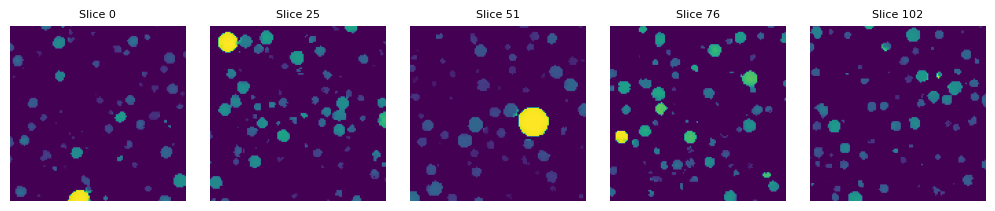

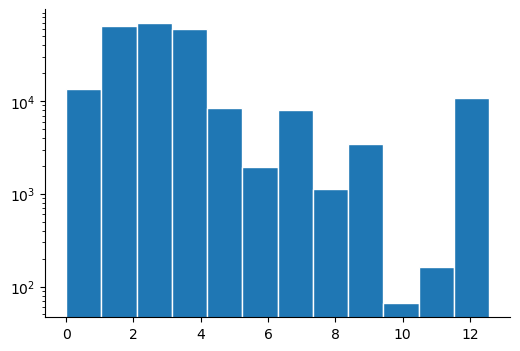




Scale: 0.200
Process done in 0.351 seconds


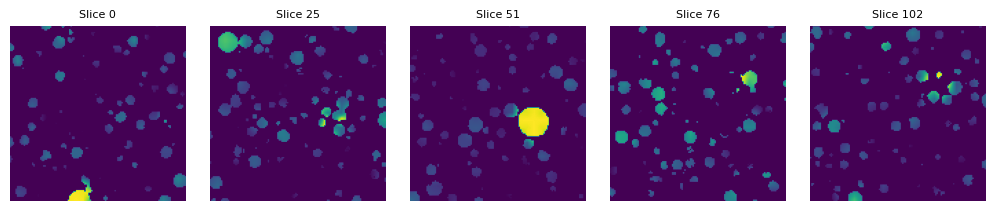

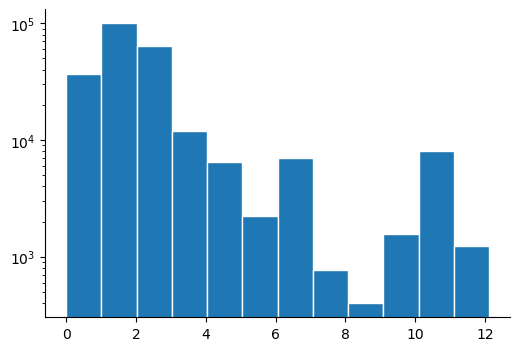

In [8]:
%matplotlib inline
nscales = 5

for scale in np.linspace(1.0, 0.0, num=nscales, endpoint=False):
    start_time = time.time()
    print(f"\n\n\nScale: {scale:.3f}")
    vol_lt = lt.local_thickness(vol, scale=scale)
    print(f"Process done in {(time.time() - start_time):.3f} seconds")
    
    fig = qim3d.viz.slice_viz(vol_lt, position=slices)  
    display(fig)
    plot_histogram(vol_lt) 
    plt.show()
